# 1. introduction into seaborn
## making a scatterplot with list

In [1]:
# import matplotlib and seaborn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
df = pd.read_csv('/Users/haneul/Documents/python/dataset/sp500_Stock/sp500_companies.csv')
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,173.07,2826994712576,1.202330e+11,0.288,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.065253
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,310.20,2328975376384,8.574500e+10,0.220,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.053758
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2795.73,1853588504576,8.519700e+10,0.410,Mountain View,CA,United States,150028.0,Larry Page and Sergey Brin founded Google in S...,0.042785
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2789.61,1853587062784,8.519700e+10,0.410,Mountain View,CA,United States,150028.0,Larry Page and Sergey Brin founded Google in S...,0.042785
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,3242.76,1644559204352,6.040400e+10,0.153,Seattle,WA,United States,1468000.0,"Amazon.com, Inc. engages in the retail sale of...",0.037960


In [3]:
df.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,502.000000,5.020000e+02,4.710000e+02,501.000000,4.980000e+02,502.000000
mean,207.815637,8.630164e+10,5.724518e+09,0.446613,5.390868e+04,0.001992
std,389.975709,2.304908e+11,1.230293e+10,2.442072,1.379629e+05,0.005320
min,12.340000,6.822073e+09,-4.755000e+09,-0.245000,1.630000e+02,0.000157
25%,66.490000,1.881398e+10,1.218800e+09,0.080000,9.000000e+03,0.000434
50%,120.345000,3.404606e+10,2.453000e+09,0.141000,1.901700e+04,0.000786
75%,227.515000,6.697056e+10,5.318500e+09,0.262000,5.248750e+04,0.001546
max,5718.000000,2.826995e+12,1.221360e+11,36.853000,2.200000e+06,0.065253


In [4]:
from sklearn.preprocessing import MinMaxScaler

df_num = np.array(df[['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Fulltimeemployees']])
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled, columns =['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Fulltimeemployees'])
scaled_df.head()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees
0,0.028170,1.000000,0.985003,0.014367,0.069931
1,0.052204,0.823408,0.713211,0.012534,0.082205
2,0.487830,0.654842,0.708892,0.017656,0.068126
3,0.486757,0.654841,0.708892,0.017656,0.068126
4,0.566178,0.580722,0.513504,0.010728,0.667248


In [5]:
scaled_df['Country'] = df['Country']

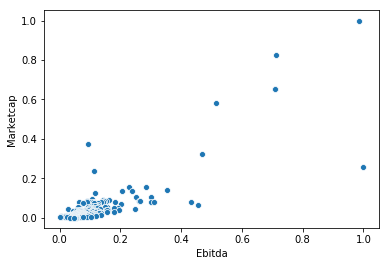

In [6]:
# create scatter plot with number of full-time employee on x-axis and market cap on the y-axis

sns.scatterplot(x = scaled_df.Ebitda, y = scaled_df.Marketcap)
plt.show()

In [7]:
scaled_df['Short name'] = df['Shortname']
scaled_df[scaled_df['Ebitda'] == 1]

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Country,Short name
7,0.054646,0.254946,1.0,0.009839,0.163574,United States,Berkshire Hathaway Inc. New


## Making a count plot with a list

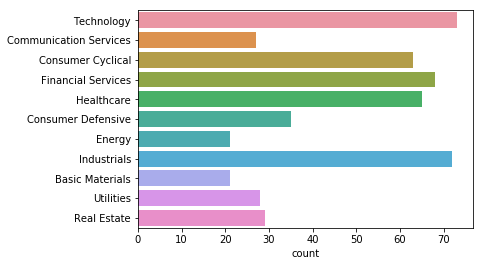

In [8]:
# create count plot with sector on the y-axis
sns.countplot(y = df.Sector.tolist())

plt.show()

## "Tidy" vs "untidy" data

In [9]:
# tidy data each observation has its own row and each variable has its own column. 

# 'untidy data' contains multiple variable in one column or each row is not about one observation

## Making a countplot with a DataFrame

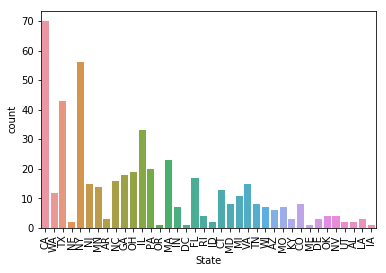

In [10]:
# create a count plot with the column name on x argument and dataframe name on data argument
sns.countplot(x = 'State', data = df)
plt.xticks(rotation = 90)
plt.show()

## Hue and scatter plots

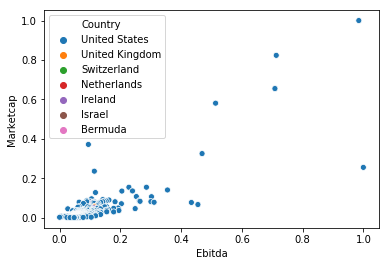

In [11]:
# 3rd factor on graph by adding hue

sns.scatterplot(x  = "Ebitda", y = "Marketcap", data = scaled_df, 
                hue = "Country", 
                hue_order = ['United States', 'United Kingdom', 
                             'Switzerland', 'Netherlands', 
                             'Ireland', 'Israel', 'Bermuda'])
plt.show()

In [12]:
df.Exchange.unique()

array(['NMS', 'NYQ', 'NGM', 'BTS'], dtype=object)

## Hue and count plots

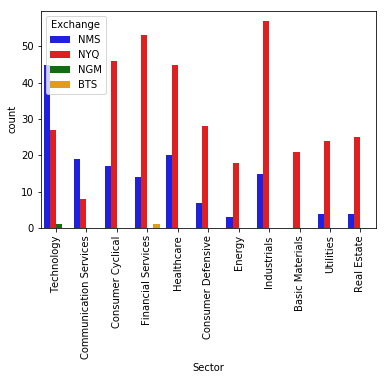

In [13]:
# create a dictionary mapping subgroup values to colors
palette_colors = {'NMS': 'blue', 'NYQ' : 'red', 'NGM': 'green', 
                  'BTS': 'orange'}

# create a count plot of country with market cap subgroup

sns.countplot(x = 'Sector' , data = df, hue = 'Exchange', palette = palette_colors)
plt.xticks(rotation = 90)
plt.show()

# 2. Visualizing Two Quantitative Variables

## Creating subplots with col and row

In [14]:
# read data
gss = pd.read_hdf('gss.hdf5')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


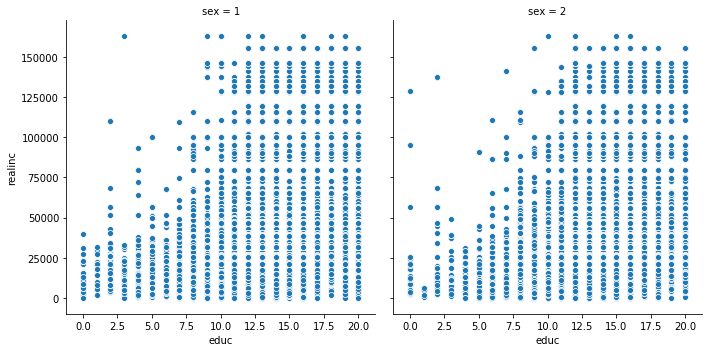

In [15]:
# change to make subplots based on 3rd factor (adding col argument)
sns.relplot(x = 'educ', y = 'realinc', data = gss, kind = 'scatter', col = 'sex')
plt.show()

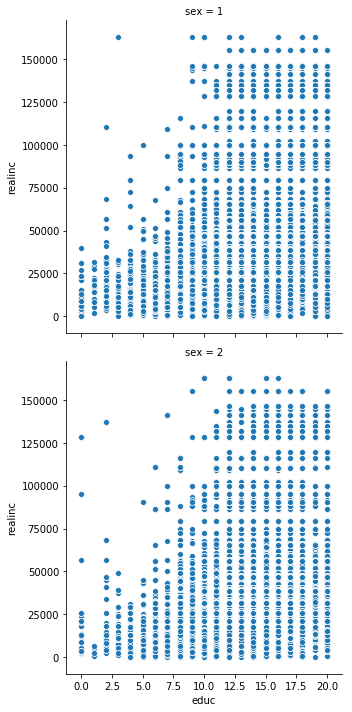

In [16]:
# change this scatter plot to arrange the plots in rows instead  of columns
sns.relplot(x = 'educ', y = 'realinc', data = gss, row = 'sex')
plt.show()

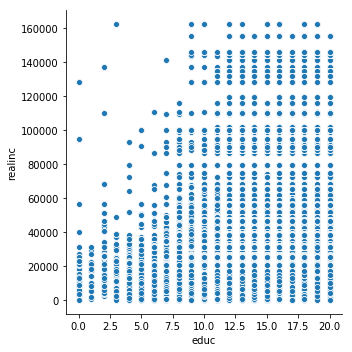

In [17]:
## Creating two-factor subplots
sns.relplot(x = 'educ', y = 'realinc', data = gss, kind = 'scatter')
plt.show()

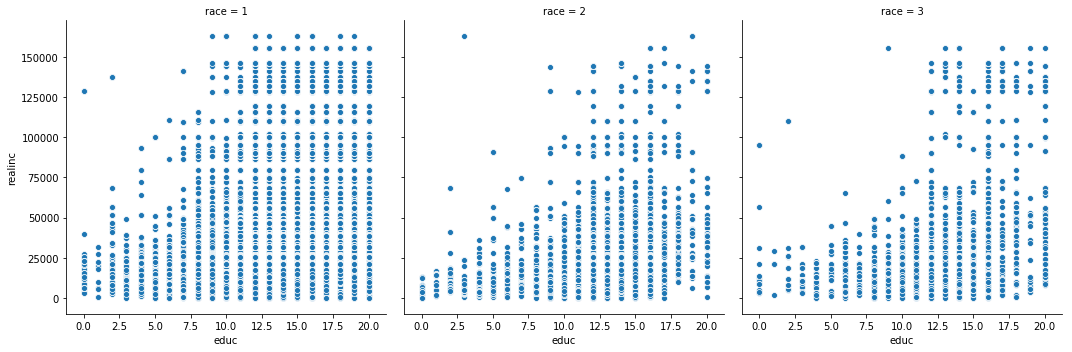

In [18]:
# adjust to add subplots based on race
sns.relplot(x = 'educ', y = 'realinc', data = gss, kind = 'scatter', col = 'race', col_order = [1,2,3])

plt.show()

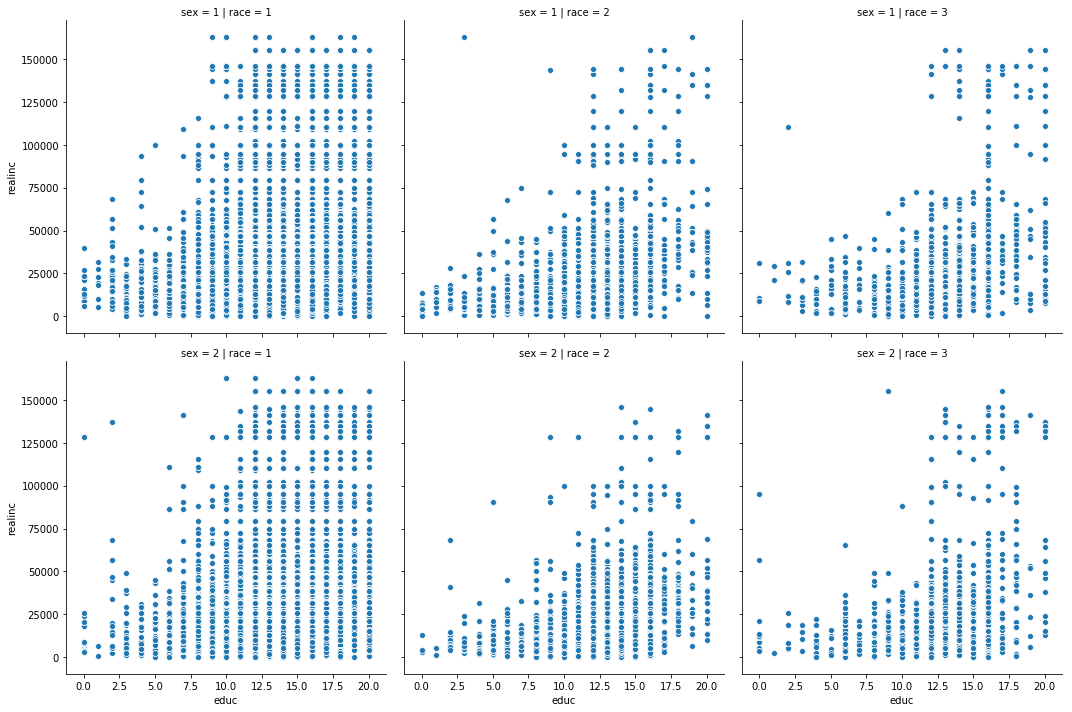

In [19]:
# adjust to add subplot based on sex
sns.relplot(x = 'educ', y = 'realinc', data = gss, kind = 'scatter', 
           col = 'race', row = 'sex', col_order = [1,2,3], row_order = [1,2])
plt.show()

## Changing the size of scatter plot points

In [20]:
scaled_df2 = scaled_df[scaled_df['Marketcap'].between(
    scaled_df['Marketcap'].quantile(.25), 
    scaled_df['Marketcap'].quantile(.75), inclusive = True)]

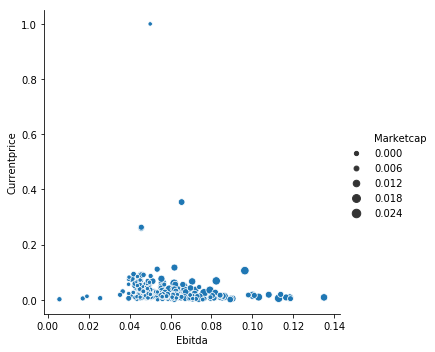

In [21]:
# create scatter plot of 'race' vs 'educ'
sns.relplot(x = 'Ebitda', y = 'Currentprice', size = 'Marketcap', data = scaled_df2, kind = 'scatter')

plt.show()

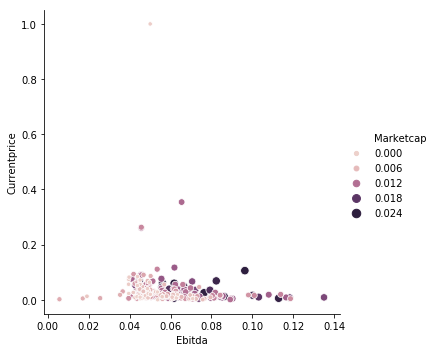

In [22]:
# to make this plot easier to read, use 'hue' to vary the color of the points by the market cap
sns.relplot(x = 'Ebitda', y = 'Currentprice', size = 'Marketcap', 
            hue = 'Marketcap', data = scaled_df2, kind = 'scatter')
plt.show()

## Changing the style of scatter plot points

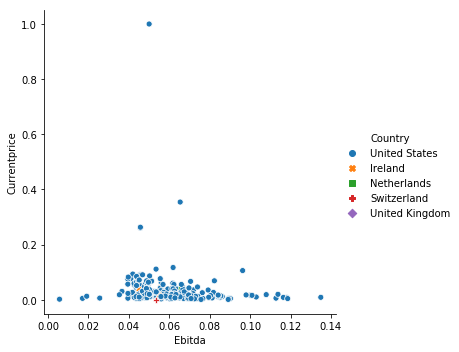

In [23]:
# vary the style of plot points
sns.relplot(x = 'Ebitda', y = 'Currentprice', data = scaled_df2, 
            kind = 'scatter',
            hue = 'Country', style = 'Country')
plt.show()

## interpreting line plots

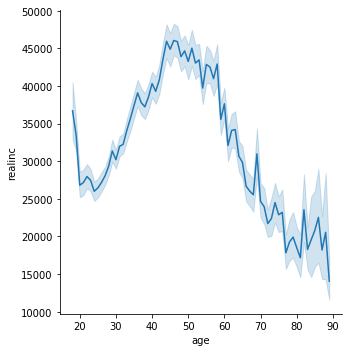

In [24]:
# create line plot
sns.relplot(data = gss, x = 'age', y = 'realinc', kind = 'line')
plt.show()

# when one x values has multiple observations, as a default, plot show mean value of them. 
# shaded region indicates 'confident interval for the mean' (find out in statistic course)

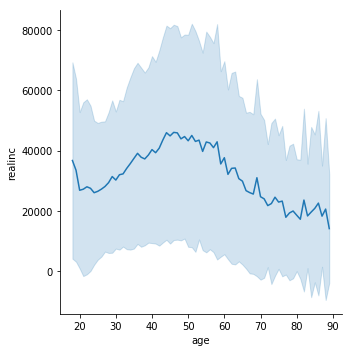

In [25]:
# make the shaded region show the standard deviation 
sns.relplot(data = gss, x = 'age', y = 'realinc', kind = 'line', ci = 'sd')
plt.show()

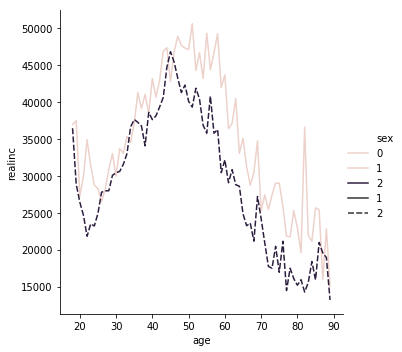

In [26]:
# vary the style of plot
sns.relplot(data = gss, x = 'age', y = 'realinc', kind = 'line', ci = None, hue = 'sex', style = 'sex')
plt.show()

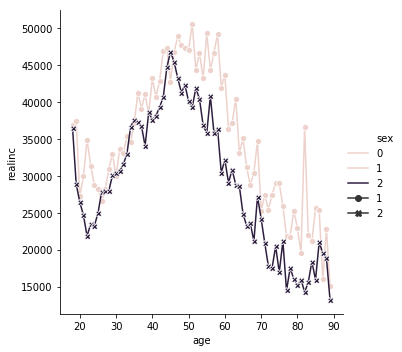

In [27]:
# add marker, make each lines have the same style
sns.relplot(data = gss, x = 'age', y = 'realinc', kind = 'line', 
            ci = None, hue = 'sex', style = 'sex',
           dashes = False, markers = True)
plt.show()

# 3. Visualizing a Categorical and a Quantitative Variable

## Count plots

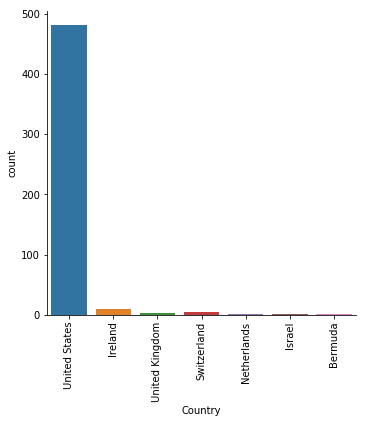

In [28]:
# categorical plot - catplot
# same advantages of relplot()
# col = , row = 

sns.catplot(x = 'Country', data = df, kind = 'count')
plt.xticks(rotation = 90)
plt.show()

## Customizing bar plots

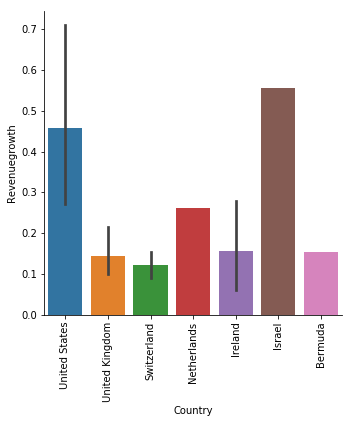

In [29]:
# catplot - bar plot

# set the order of bar
order = ['United States', 'United Kingdom', 'Switzerland', 'Netherlands', 'Ireland', 'Israel', 'Bermuda']
sns.catplot(x = 'Country', y = 'Revenuegrowth', data = df, kind = 'bar', order = order)

plt.xticks(rotation = 90)
plt.show()

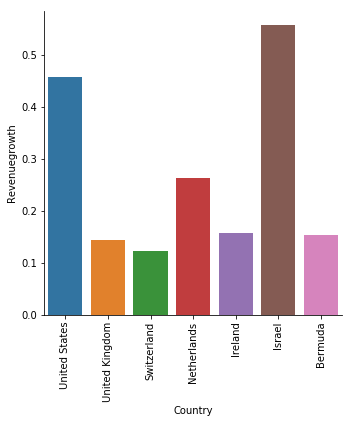

In [30]:
# turn off the confidence intervals
sns.catplot(x = 'Country', y = 'Revenuegrowth', data = df, kind = 'bar', ci = None, order = order)
plt.xticks(rotation = 90)
plt.show()

In [31]:
df[df['Country'] == 'Israel']

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
444,NMS,SEDG,"SolarEdge Technologies, Inc.","SolarEdge Technologies, Inc.",Technology,Solar,253.83,13331024896,220704992.0,0.557,Herzliya,NaN,Israel,3174.0,"SolarEdge Technologies, Inc., together with it...",0.000308


## Create and interpret a box plot

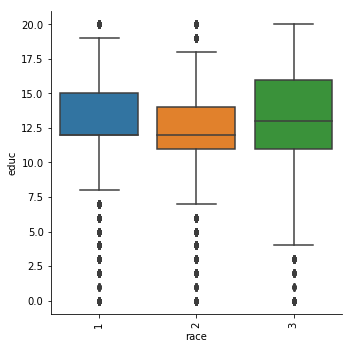

In [32]:
# create a box plot
sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'box')
plt.xticks(rotation = 90)
plt.show()

## Omitting outliers

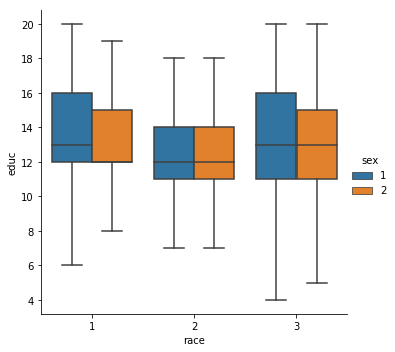

In [33]:
# sym = ""

sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'box', hue = 'sex', sym = '')
plt.show()

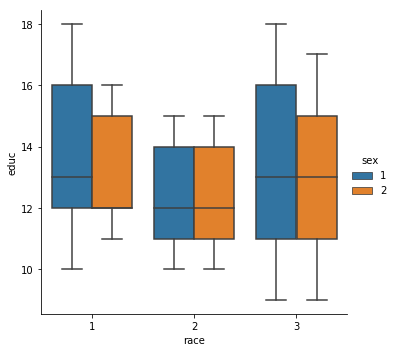

In [34]:
# change the whiskers (default 1.5 * IQR range) to 0.5 * IQR

sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'box', hue = 'sex', sym = '', whis = 0.5)
plt.show()

## adjusting the whiskers

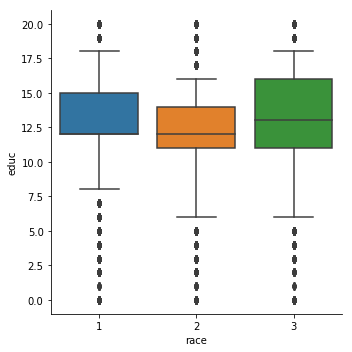

In [35]:
# extend the whiskers to the 5th and 95th percentile
sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'box', whis = [5, 95])
plt.show()

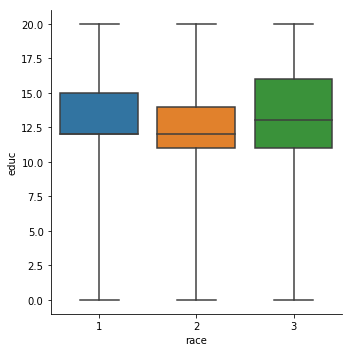

In [36]:
# set the whiskers to the min and max values
sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'box', whis = [0, 100])

plt.show()

## Customizing point plots
shows the mean of numeric values on y axis with 95% confidence intervals for the mean
- Line plot: both quantitative variable (x, y)
- Point plot: x = categorical, y = quantitative 
value
- bar plot: x = categorical, y = quantitative value, but point plot is easier to compare the heights of the subgroup points

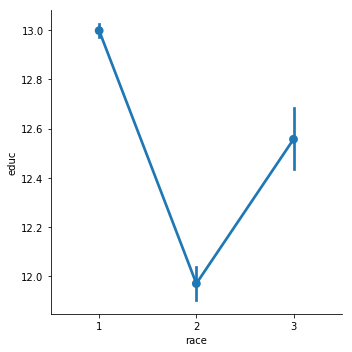

In [37]:
# create a point plot: point shows the mean of quantitative variable
sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'point')
plt.show()

# vertical lines show 95% confidence intervals

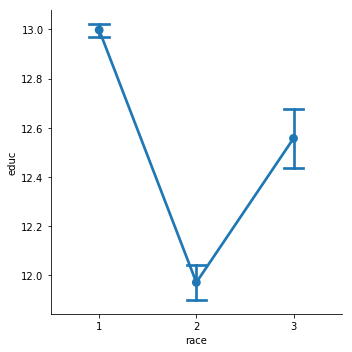

In [38]:
# add caps to the confidence intervals
sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'point', capsize = 0.2)
plt.show()

# vertical lines show 95% confidence intervals

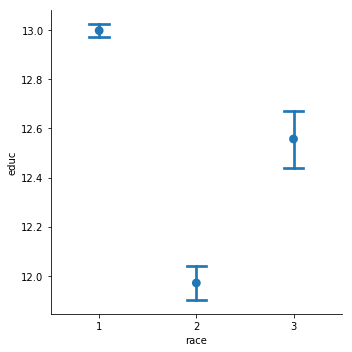

In [39]:
# remove the lines joining the points
sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'point', capsize= 0.2, join = False)
plt.show()

## Point plots with subgroups

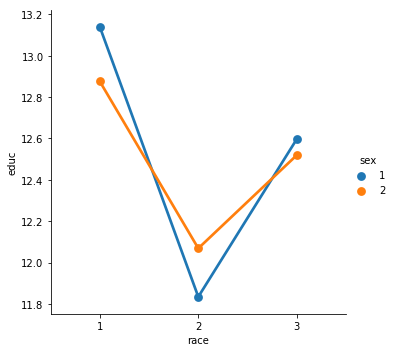

In [40]:
# add 'hue'
# turn off the confidence intervals for this plot
sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'point', ci = None, hue = 'sex')
plt.show()

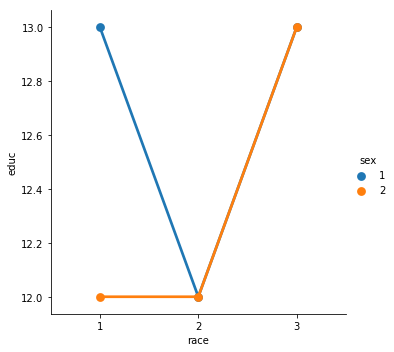

In [41]:
# import median function from numpy
from numpy import median

# plot the median number of education years instead of mean (default)

sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'point', 
            ci = None, hue = 'sex', estimator = median)
plt.show()

# 4. Customizing Seaborn Plots

## Changing style and palette

In [43]:
df.Sector.unique()

array(['Technology', 'Communication Services', 'Consumer Cyclical',
       'Financial Services', 'Healthcare', 'Consumer Defensive', 'Energy',
       'Industrials', 'Basic Materials', 'Utilities', 'Real Estate'],
      dtype=object)

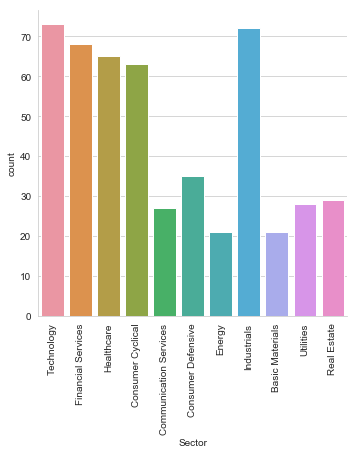

In [49]:
# set the style to "whitegrid"
sns.set_style('whitegrid')

# create a count plot of survey responses
sector_order = ['Technology', 'Financial Services', 'Healthcare', 'Consumer Cyclical',
               'Communication Services', 'Consumer Defensive', 'Energy',
               'Industrials', 'Basic Materials', 'Utilities', 'Real Estate']
sns.catplot(x = 'Sector', data = df, kind = 'count', order = sector_order)

plt.xticks(rotation = 90)
plt.show()

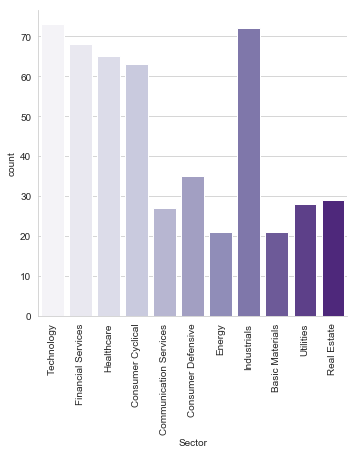

In [61]:
# set the style to "whitegrid"
sns.set_style('whitegrid')

# set the color palette to 'Purple'
sns.set_palette('Purples', n_colors = 11)  # when number of color is more than 5, set n_colors

# create a count plot of survey responses
sector_order = ['Technology', 'Financial Services', 'Healthcare', 'Consumer Cyclical',
               'Communication Services', 'Consumer Defensive', 'Energy',
               'Industrials', 'Basic Materials', 'Utilities', 'Real Estate']
sns.catplot(x = 'Sector', data = df, kind = 'count', order = sector_order)

plt.xticks(rotation = 90)
plt.show()

## Changing the scale

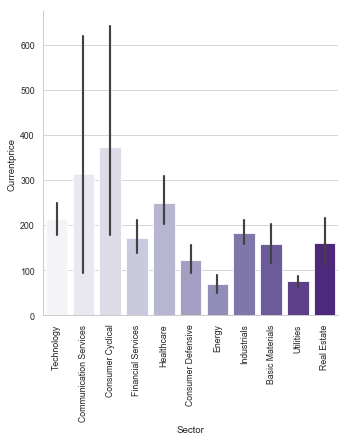

In [63]:
# change the setting according to the use of analysis

# set the context to "paper"
sns.set_context("paper")
sns.catplot(x = "Sector", y = "Currentprice", data = df, kind = "bar")
plt.xticks(rotation = 90)
plt.show()

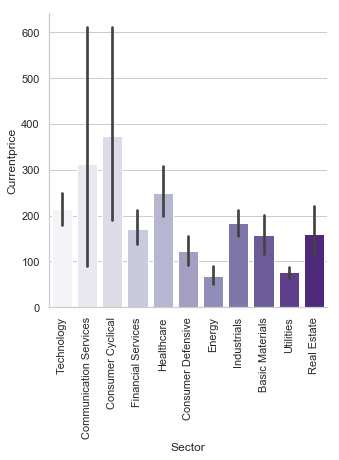

In [64]:
# set the context to "notebook"
sns.set_context("notebook")
sns.catplot(x = "Sector", y = "Currentprice", data = df, kind = "bar")
plt.xticks(rotation = 90)
plt.show()

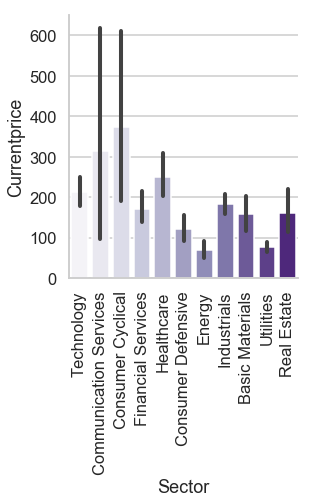

In [65]:
# set the context to "talk"
sns.set_context("talk")
sns.catplot(x = "Sector", y = "Currentprice", data = df, kind = "bar")
plt.xticks(rotation = 90)
plt.show()

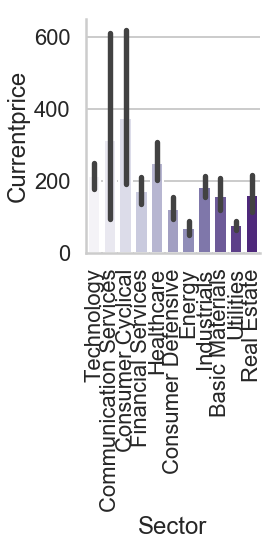

In [66]:
# set the context to "poster"
sns.set_context("poster")
sns.catplot(x = "Sector", y = "Currentprice", data = df, kind = "bar")
plt.xticks(rotation = 90)
plt.show()

## Using a custom palette

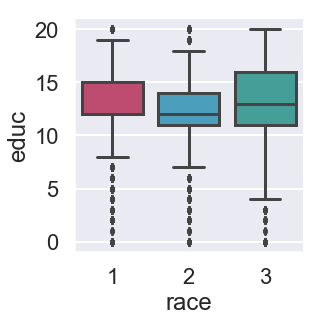

In [68]:
# set the style to "darkgrid"
sns.set_style("darkgrid")

sns.set_palette(["#d03969", "#39A7D0","#36ADA4"])

# create the box plot of education year by race
sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'box')

plt.show()

## FacetGrids VS AxesSubplots

- AxesSuplots : The type when there is a single plot.
>- scatterplot, countplot, and etc
- FacetGrids: The type when there are multiple plots.
>- relplot, catplot

<class 'seaborn.axisgrid.FacetGrid'>


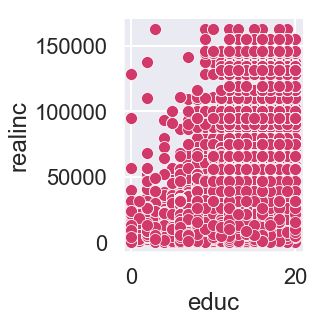

In [70]:
# create scatterplot
g = sns.relplot(x = 'educ', y = 'realinc', data = gss, kind = 'scatter')

# identify the plot type
type_of_g = type(g)

print(type_of_g)

## adding a title to a FacetGrid object

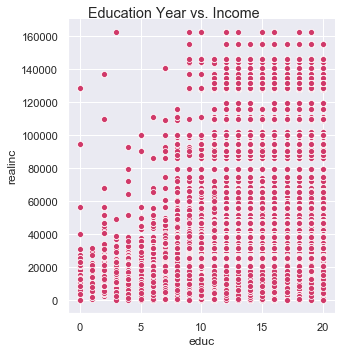

In [71]:
# create scatter plot
sns.set_context('notebook')
g = sns.relplot(x = 'educ', y= 'realinc', data = gss, kind = 'scatter')

# add a title "Education Year vs. Income"
g.fig.suptitle("Education Year vs. Income")

plt.show()

## Adding a title and axis labels (AxesSubplots)

In [78]:
gss2 = gss.groupby('educ').mean()
gss2.reset_index(inplace=True)

In [79]:
gss2.head()

,educ,year,age,cohort,sex,race,realinc,gunlaw,grass,wtssall
0,0.0,1992.541667,63.664234,1929.562044,1.534722,1.770833,15290.635124,1.200000,1.917808,1.344986
1,1.0,1989.078947,58.921053,1930.157895,1.263158,1.894737,13347.171875,1.217391,1.956522,1.186943
2,2.0,1993.622517,55.377483,1938.245033,1.430464,1.576159,25174.645592,1.207921,1.855422,1.333880
3,3.0,1986.768293,61.914286,1924.910204,1.434959,1.524390,12203.863350,1.166667,1.944056,1.176502
4,4.0,1989.048276,60.031142,1929.048443,1.437931,1.582759,14038.376914,1.288557,1.894737,1.188466


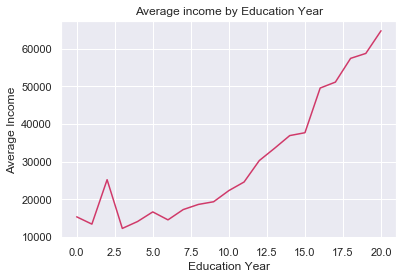

In [84]:
# create line plot

g = sns.lineplot(x = 'educ', y = 'realinc', data = gss2)

# add a title "Average income by Education Year"
g.set_title('Average income by Education Year')

g.set(xlabel = 'Education Year', ylabel= 'Average Income')

plt.show()

## Box plot with subgroup

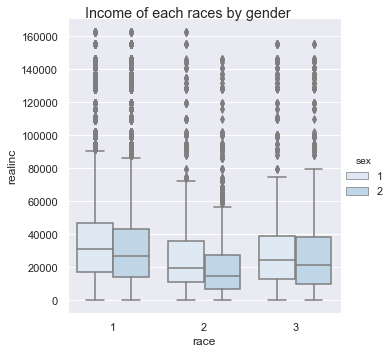

In [88]:
sns.set_palette('Blues')

# create a box plot with subgroups (hue)
g = sns.catplot(x = 'race', y = 'realinc', data = gss, kind = 'box', hue = 'sex')

# set title to "Income of each races by gender"
g.fig.suptitle('Income of each races by gender')

plt.show()

## Bar plot with subgroup and subplots

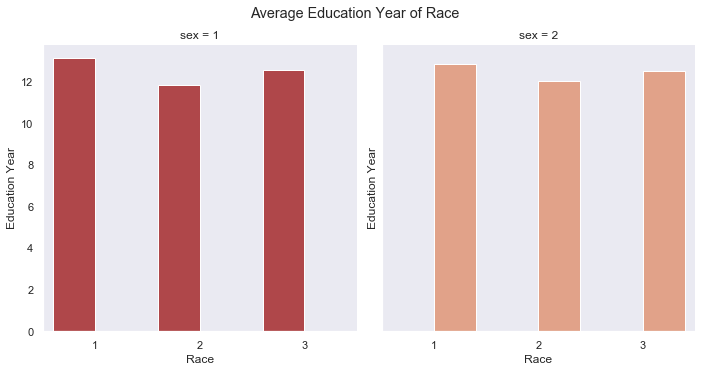

In [96]:
# set the figure style to 'dark'
sns.set_style('dark')
sns.set_palette('RdBu')

# adjust the bar plot code to add subplots based on 'sex', arranged in columns
g = sns.catplot(x = 'race', y = 'educ', data = gss, kind = 'bar', ci = None, hue = 'sex',  col = 'sex')

# add title and axis labels
g.fig.suptitle('Average Education Year of Race', y = 1.03)
g.set(xlabel = 'Race', ylabel = 'Education Year')

plt.show()